In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import style
%matplotlib inline

In [140]:
car_data = pd.read_csv('car data.csv')

In [141]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [142]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [143]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [144]:
car_data.describe()
car_data.columns
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


<Axes: xlabel='Transmission', ylabel='Selling_Price'>

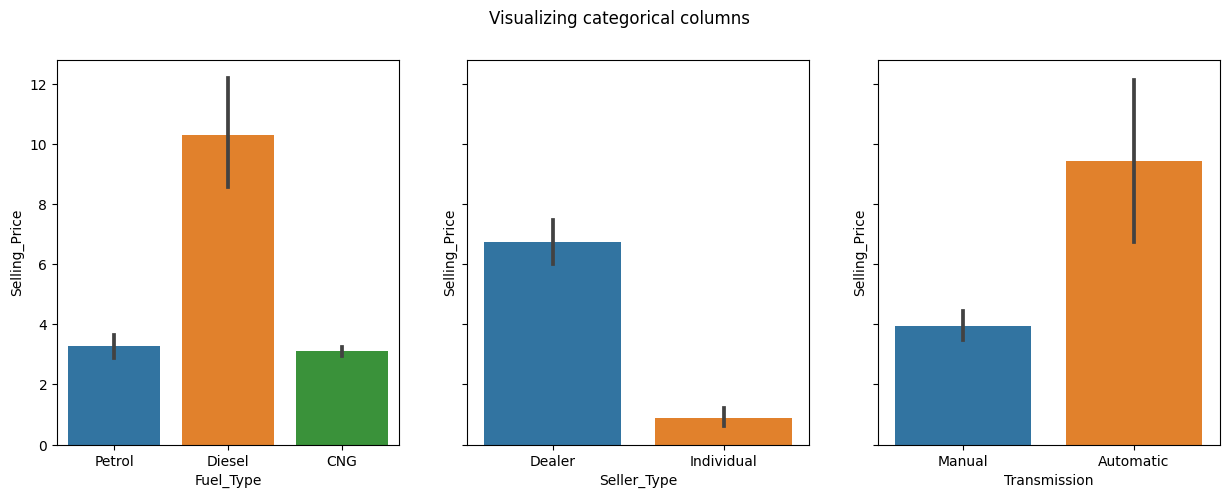

In [145]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [146]:
petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [147]:
seller_data = car_data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [148]:
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)

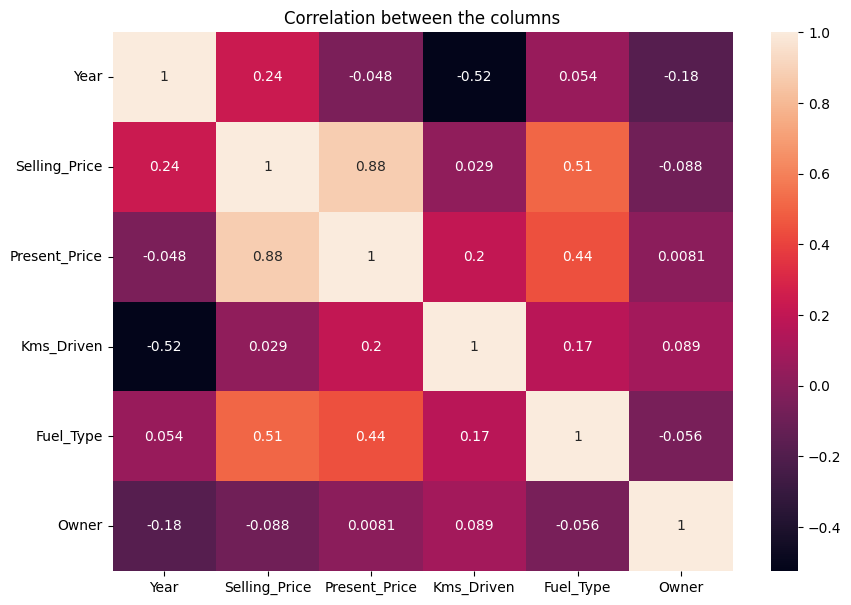

In [149]:
numeric_columns = car_data.select_dtypes(include='number')

plt.figure(figsize=(10,7))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

<Axes: title={'center': 'Correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

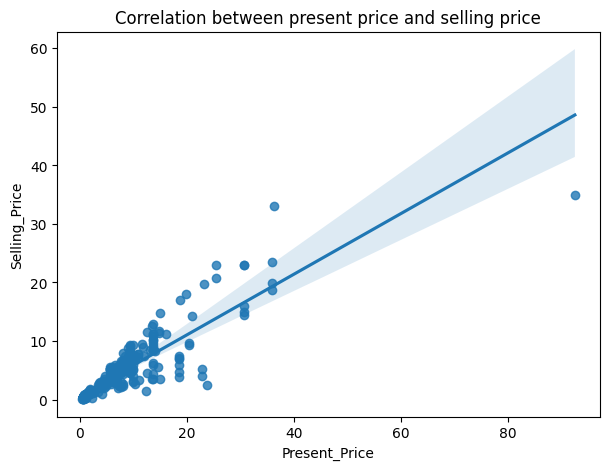

In [150]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)

In [151]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [152]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (301, 7)
Shape of y is:  (301,)


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape:  (91,)
y_train shape: (210,)


In [154]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 177 to 114
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    91 non-null     int64  
 1   Present_Price           91 non-null     float64
 2   Kms_Driven              91 non-null     int64  
 3   Fuel_Type               91 non-null     int64  
 4   Owner                   91 non-null     int64  
 5   Seller_Type_Individual  91 non-null     bool   
 6   Transmission_Manual     91 non-null     bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 4.4 KB


In [155]:
X_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
177,2016,0.57,24000,0,0,True,False
289,2016,13.60,10980,0,0,False,True
228,2012,9.40,60000,1,0,False,True
198,2011,0.57,35000,0,1,True,True
60,2013,18.61,40001,0,0,False,True
...,...,...,...,...,...,...,...
119,2013,1.90,5400,0,0,True,True
19,2010,7.98,41442,0,0,False,True
181,2016,0.48,50000,0,0,True,True
79,2012,30.61,89000,1,0,False,False


In [156]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
model = LinearRegression()

In [158]:
X_train

array([[-1.99046855, -0.76923237, -0.83904661, ..., -0.18730358,
         1.35566878, -2.85139173],
       [-0.24444351,  1.26268234,  0.43381798, ..., -0.18730358,
        -0.73764331,  0.35070593],
       [ 0.80317152,  0.38139709,  0.12793616, ..., -0.18730358,
        -0.73764331,  0.35070593],
       ...,
       [ 0.1047615 , -0.44579392, -0.49554421, ...,  3.38849211,
         1.35566878,  0.35070593],
       [-0.94285352,  0.292367  ,  0.74767564, ..., -0.18730358,
        -0.73764331,  0.35070593],
       [ 1.15237653, -0.63399678, -0.78963873, ..., -0.18730358,
         1.35566878,  0.35070593]])

In [159]:
model.fit(X_train, y_train)

LinearRegression()

In [160]:
pred = model.predict(X_test)
# X_test

In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [162]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  1.2581404706473374
MSE:  3.4932860262251477
R2 score:  0.8294933369778814


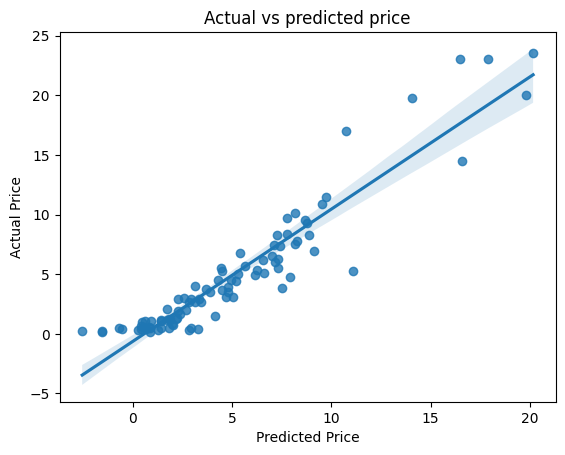

In [163]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

In [164]:
present_price = float(0.57)#float(input("Enter the present price of the car: "))
kms_driven = 24000#int(input("Enter the total kilometers driven by the car: "))
owner = 0 #int(input("Enter the number of previous owners of the car: "))
year = 2014 #int(input("Enter the year of purchase: "))
fuel_type = 0 #int(input("Enter the fuel type of the car (Petrol=0/Diesel=1/CNG=2): "))
seller_type = True #bool(input("Enter the seller type (Dealer/Individual): "))
transmission_type = True #bool(input("Enter the transmission type (Manual/Automatic): "))
# Create a DataFrame from the user input
user_data = pd.DataFrame({
    'Year': [year],
    'Present_Price': [present_price],
    'Kms_Driven': [kms_driven],
    'Fuel_Type': [fuel_type],
    'Owner': [owner],
    'Seller_Type_Individual': [seller_type],
    'Transmission_Manual': [transmission_type]
})


user_data = scaler.transform(user_data)
predicted_price = model.predict(user_data)
print("Predicted car price: ", predicted_price*82 , "Dollars")

Predicted car price:  [54.4255188] Dollars
